# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [3]:
import pandas as pd
import pandas_profiling
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [4]:
data_short = pd.read_excel('geo.xlsx', index_col = 0)

In [5]:
data_short.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [4]:
data_short.isnull().sum()

x                0
y                0
comment_class    0
dtype: int64

In [8]:
data_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB


# K-Means

Для начала возьмем количество кластеров как количество районов Москвы, которое указано в Википедии.

In [71]:
kmeans = MiniBatchKMeans(n_clusters=125,random_state=0)

In [6]:
X = data_short[['x', 'y']]

In [46]:
X.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


In [7]:
scaler = StandardScaler()

In [8]:
X_scaled = scaler.fit_transform(X)

In [57]:
kmeans.fit(X_scaled )

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=125, n_init=3, random_state=0, reassignment_ratio=0.01,
        tol=0.0, verbose=0)

In [24]:
kmeans.cluster_centers_

array([[37.64762719, 55.88043302],
       [37.4538381 , 55.7927195 ],
       [37.74845112, 55.70769998],
       [37.53718654, 55.68274591],
       [37.43197242, 55.85665413],
       [37.55978514, 55.76923652],
       [37.7169789 , 55.75147565],
       [37.48264062, 55.67683008],
       [37.6482218 , 55.82022071],
       [37.80587362, 55.79909709],
       [37.36303461, 55.84529128],
       [37.550973  , 55.8895377 ],
       [37.69981195, 55.62934284],
       [37.692959  , 55.748777  ],
       [37.55964   , 55.768831  ],
       [37.53214813, 55.64951013],
       [37.442095  , 55.883792  ],
       [37.67635078, 55.68118595],
       [37.51575874, 55.79795952],
       [37.6241659 , 55.6620431 ],
       [37.39160576, 55.89230682],
       [37.6908457 , 55.86892728],
       [37.8629777 , 55.700257  ],
       [37.5722074 , 55.7849048 ],
       [37.50751449, 55.74010321],
       [37.60079632, 55.79194541],
       [37.488808  , 55.65887   ],
       [37.70291864, 55.7306594 ],
       [37.60844342,

In [58]:
kmeans.cluster_centers_.shape

(125, 2)

In [59]:
clusters = kmeans.predict(X_scaled )

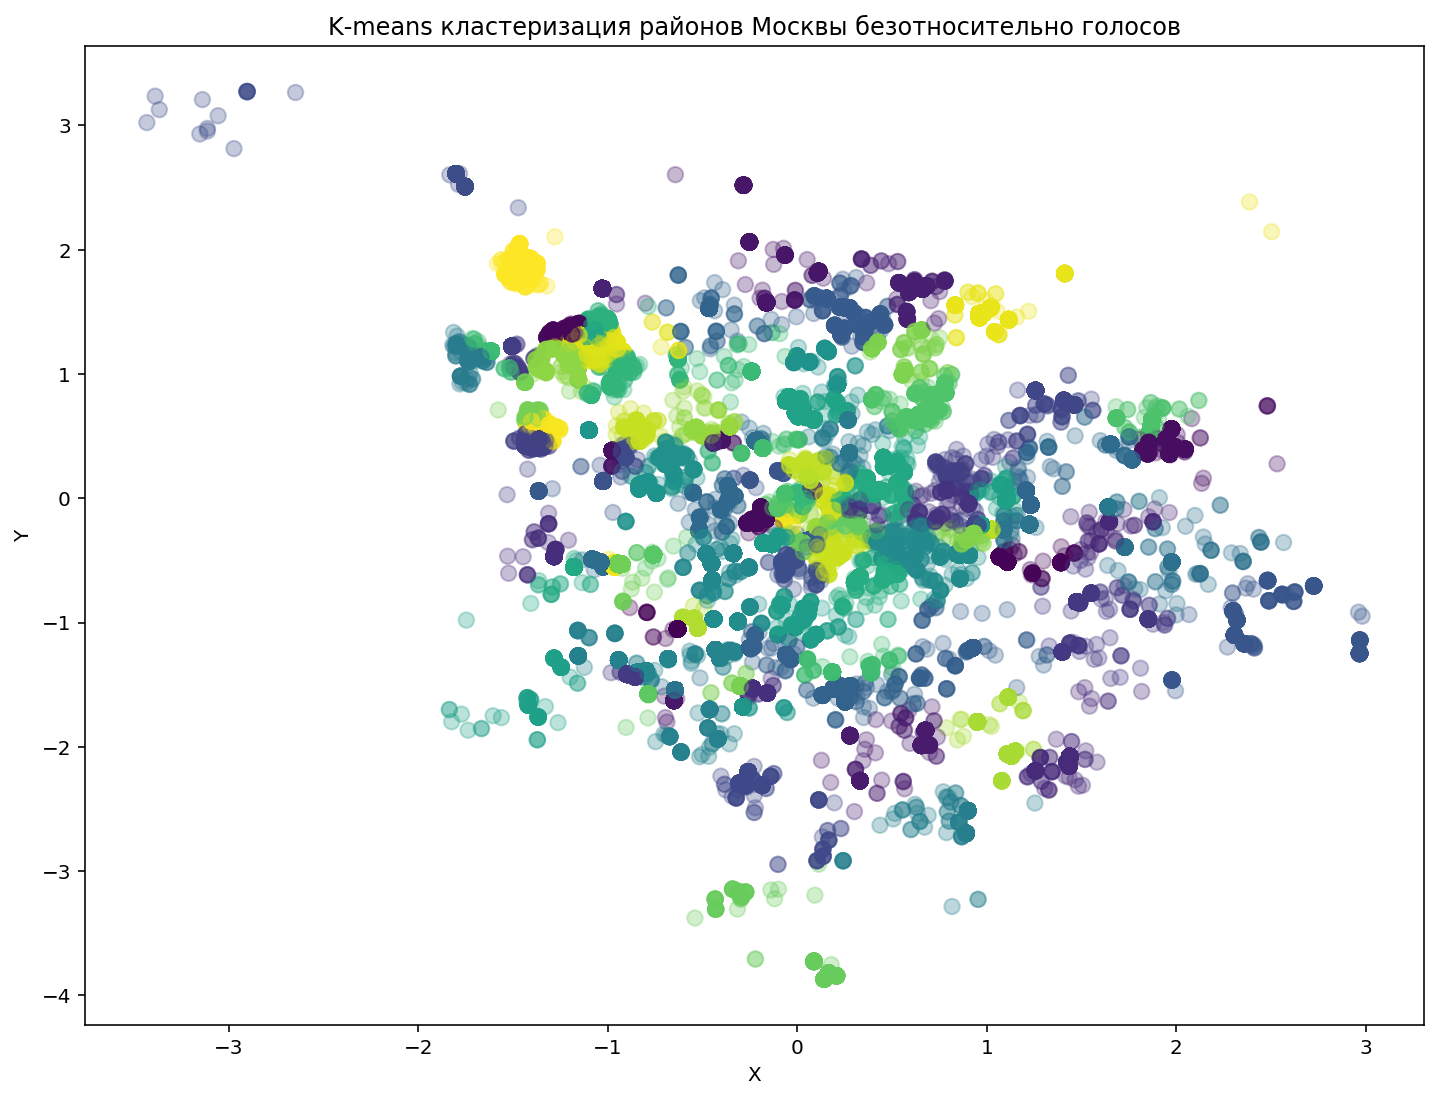

In [60]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,s=60, alpha=0.3)
plt.title('K-means кластеризация районов Москвы безотносительно голосов')
plt.xlabel('X')
plt.ylabel('Y');

Попробуем подобрать оптимальное количество кластеров

In [61]:
k_inertia = []
ks = range(10,125)

for k in ks:
    clf_kmeans =  MiniBatchKMeans(n_clusters=k,random_state=0)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

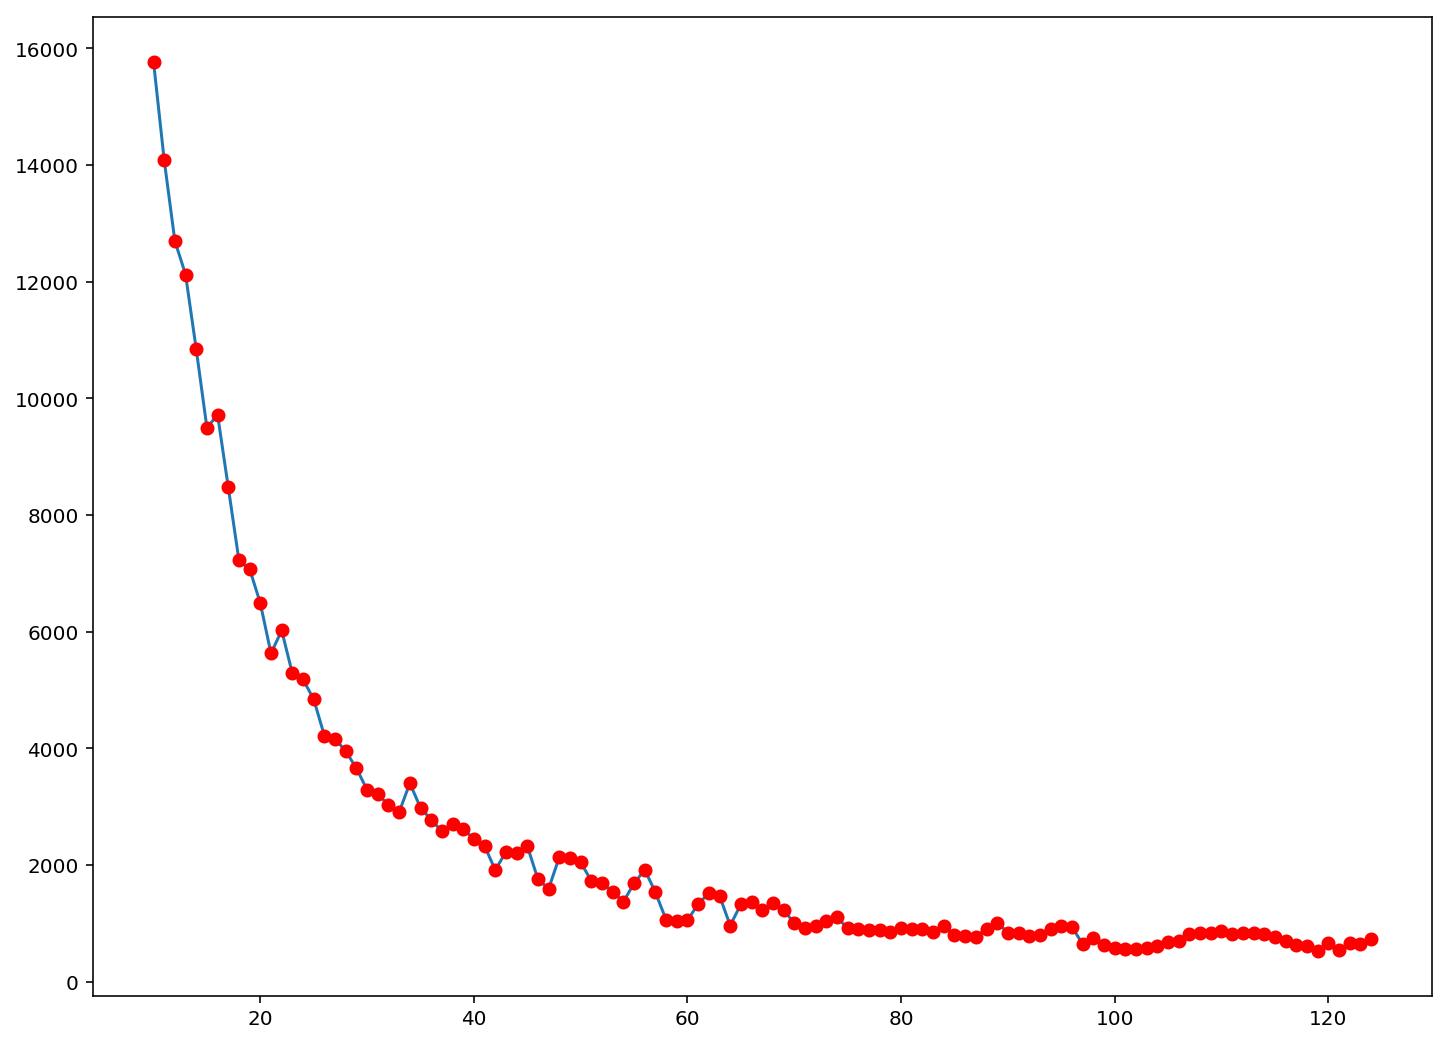

In [62]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro');

In [63]:
diff = np.diff(k_inertia)

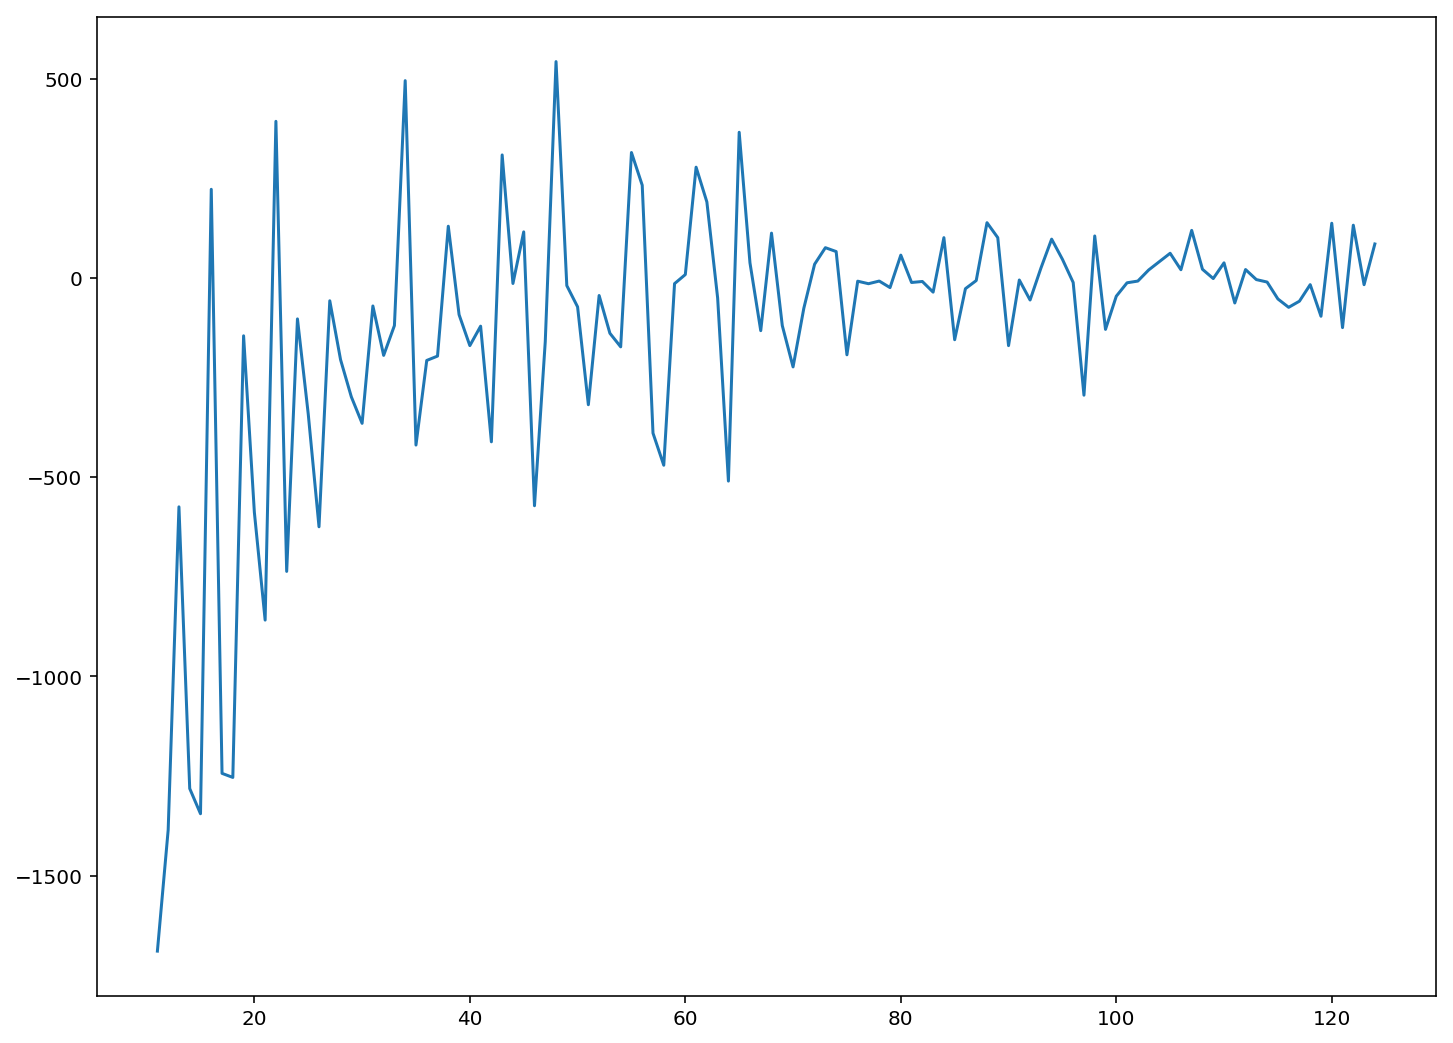

In [64]:
plt.plot(ks[1:], diff)

In [65]:
diff_r = diff[1:] / diff[:-1]

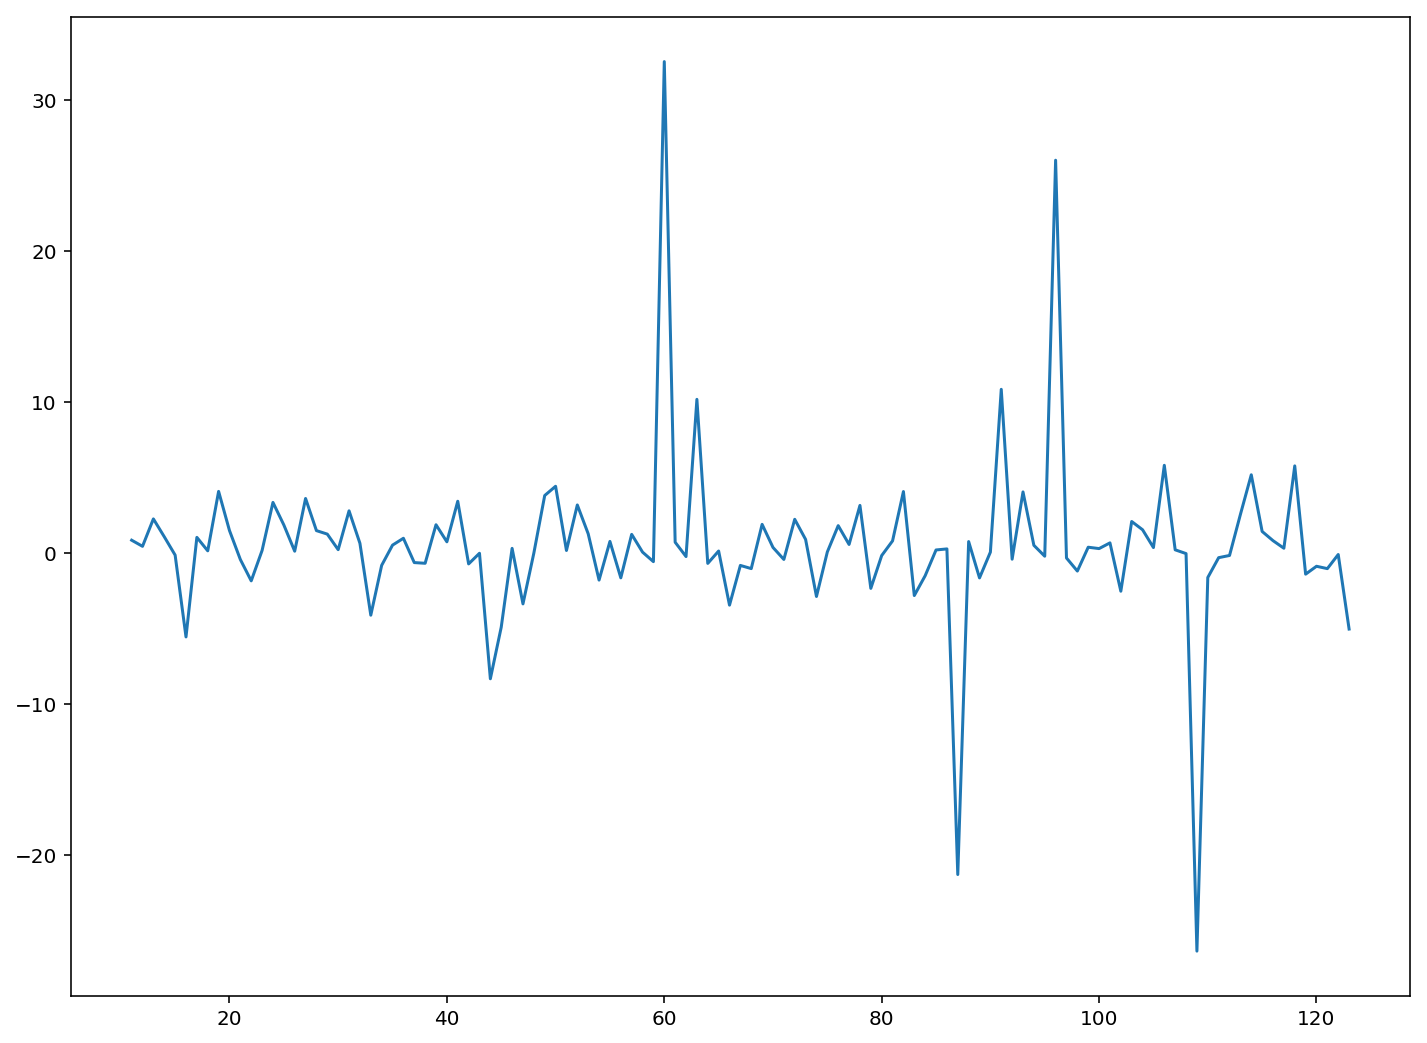

In [66]:
plt.plot(ks[1:-1], diff_r)

In [67]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

109

В качестве оптимального значения получили 109. Попробуем  изобрать это на графике

In [68]:
kmeans_109 = MiniBatchKMeans(n_clusters=109,random_state=0)

In [69]:
kmeans_109.fit(X_scaled )

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=109, n_init=3, random_state=0, reassignment_ratio=0.01,
        tol=0.0, verbose=0)

In [73]:
clusters = kmeans_109.predict(X_scaled )

In [74]:
clusters 

array([ 75,  75,  98, ...,  81, 104,  60])

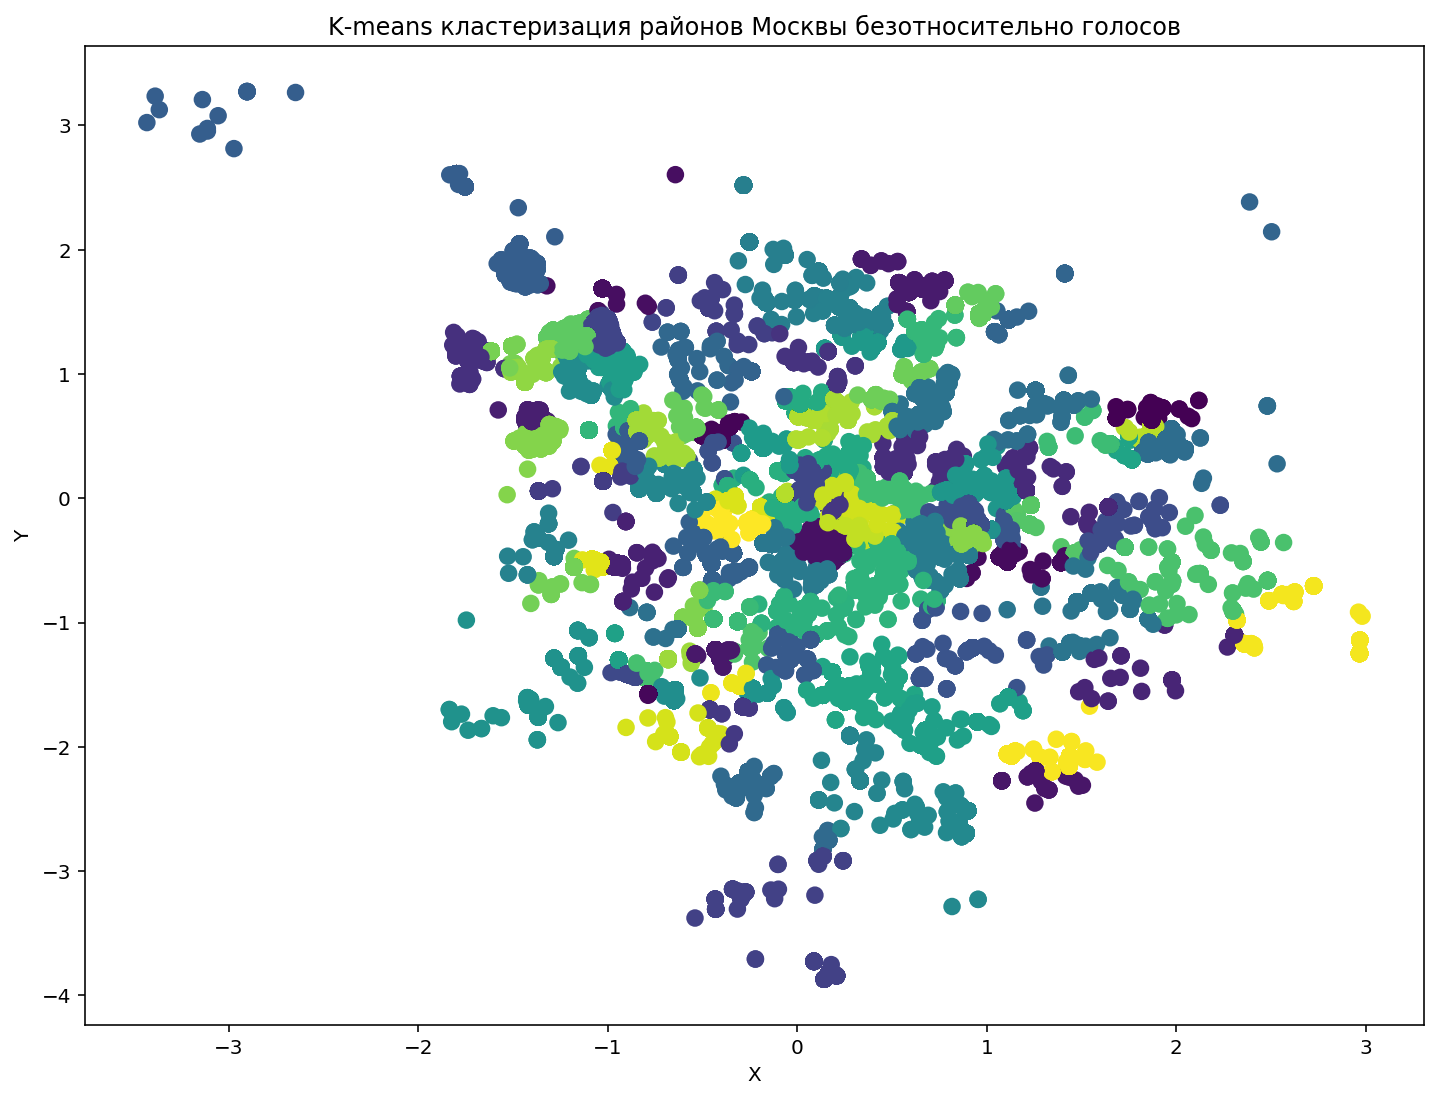

In [75]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,s=60)
plt.title('K-means кластеризация районов Москвы безотносительно голосов')
plt.xlabel('X')
plt.ylabel('Y');

Выявить сформировавшиеся кластеры теперь легче, но можно видеть достатоно много неточностей.

# Агломеративная кластеризация

Из-за ограничения в памяти компьютера пришлось использовать только очень маленьки образец данных :(

In [52]:
agg = AgglomerativeClustering(n_clusters=109)

In [53]:
index = np.random.choice(np.arange(len(X_scaled)),5000,replace=False)

In [54]:
X_scaled[index].shape

(5000, 2)

In [55]:
X_sample = X_scaled[index]

In [208]:
clusters_agg = agg.fit_predict(X_sample)

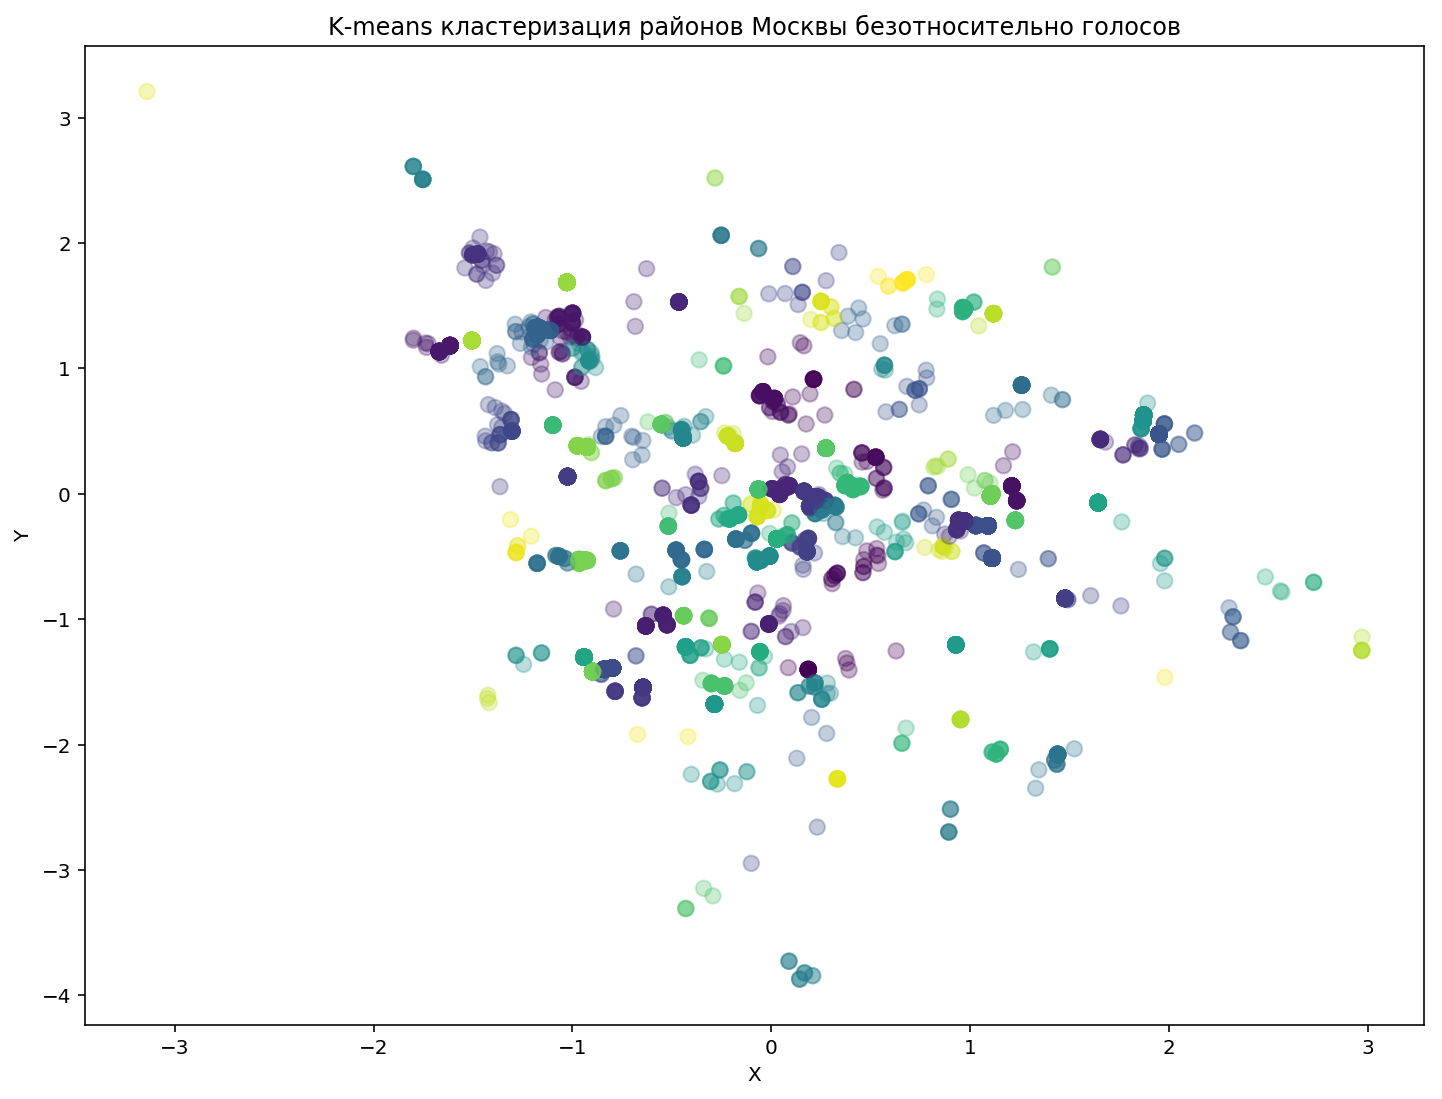

In [209]:
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=clusters_agg ,s=60, alpha = 0.3)
plt.title('K-means кластеризация районов Москвы безотносительно голосов')
plt.xlabel('X')
plt.ylabel('Y');

На маленьких количествах кластеризация скорее похоже на рисование одного шума и скорее бесполезна

In [210]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

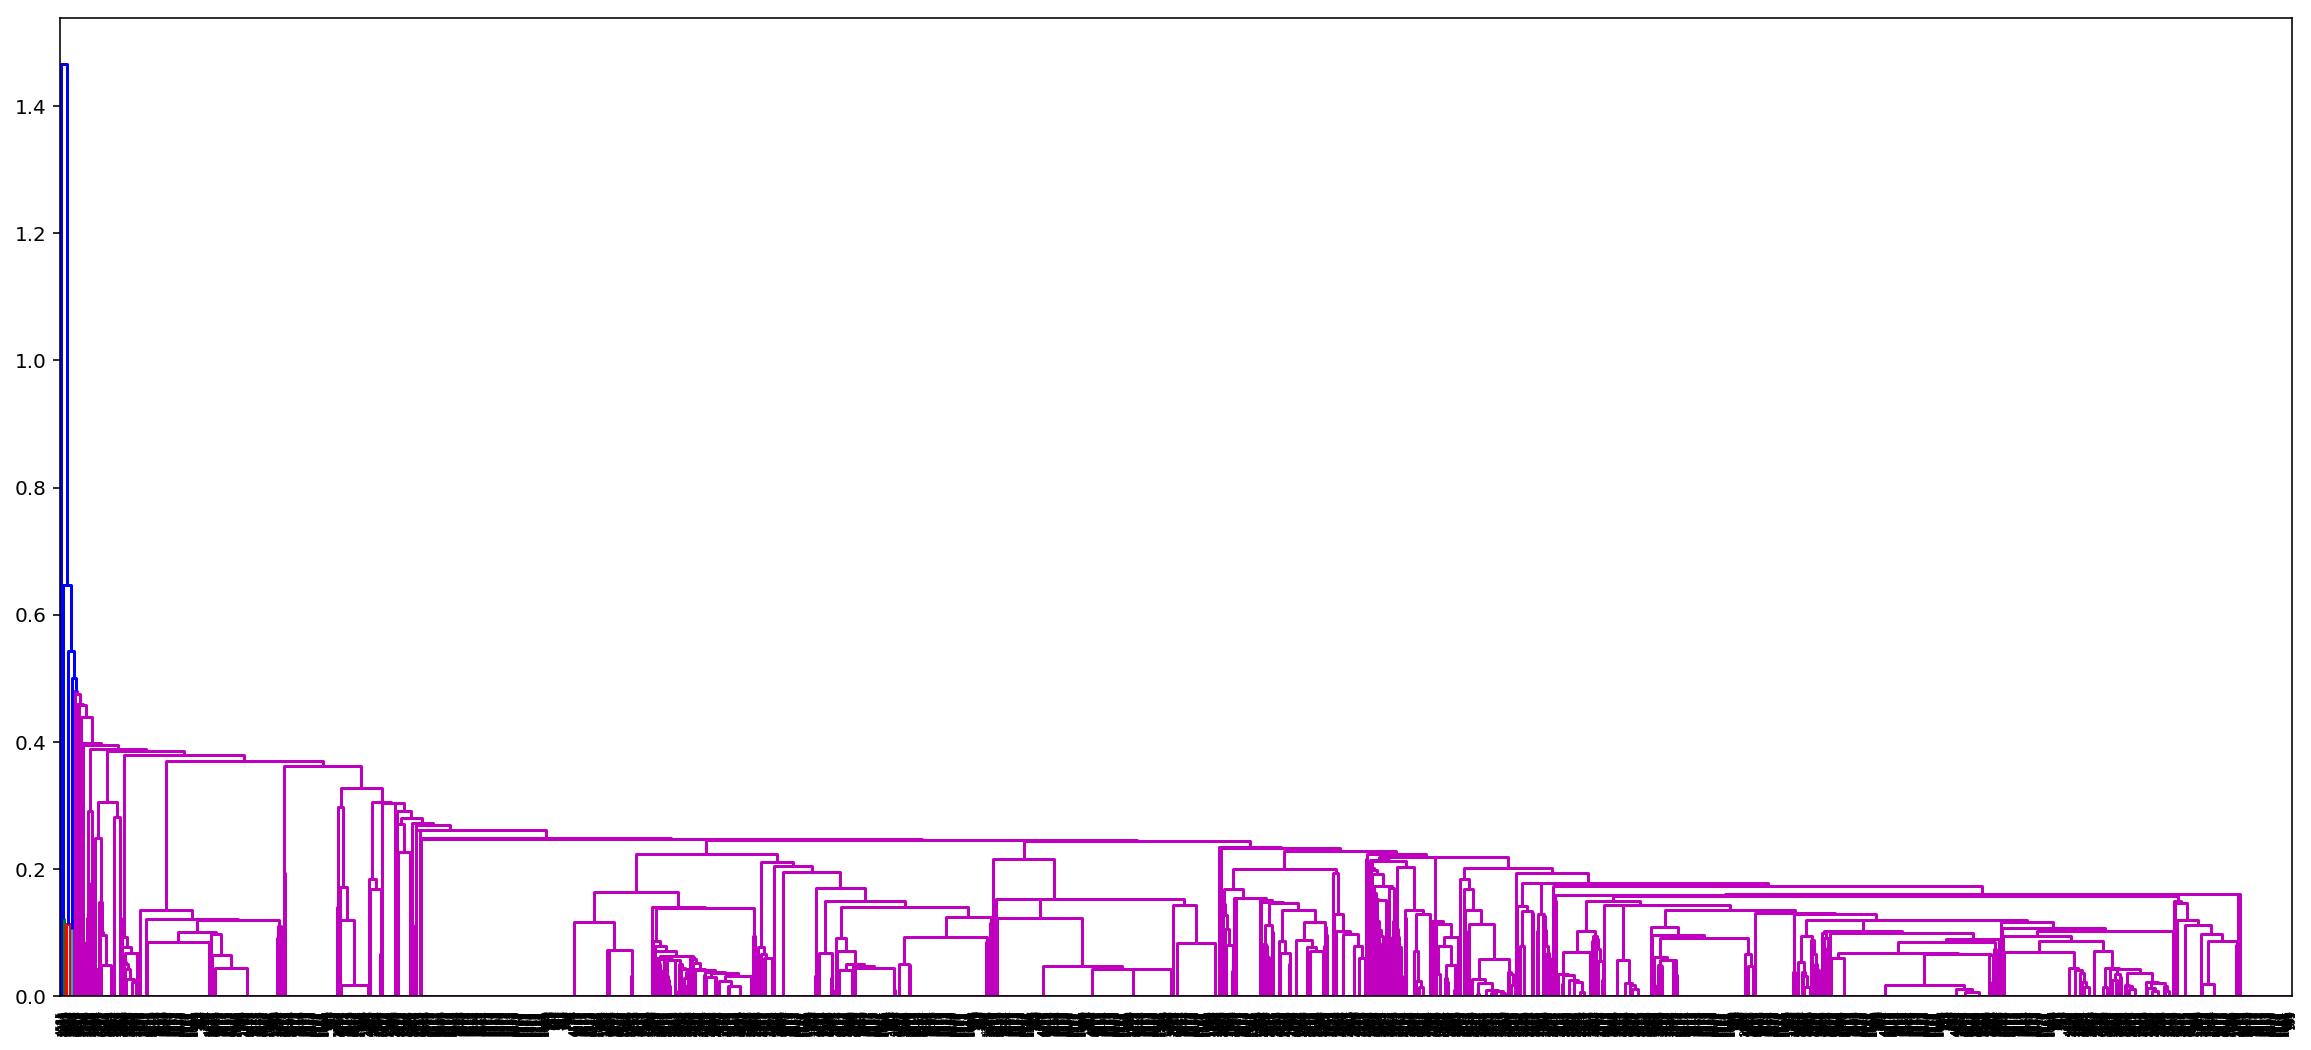

In [212]:
distance_mat = pdist(X_sample) # pdist посчитает нам верхний треугольник матрицы попарных расстояний
Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

Рисование дендрограммы для большого количества объектов не очень. Можно попробовать сначала с помощью k-means выделить несколько больших кластеров, взять из каждого кластера некоторую одинаковое количество строк, объединить их и построить по ним агломеративную кластеризацию

Выделим 20 больших кластеров

In [284]:
n_clusters=20

In [285]:
kmeans_15 = MiniBatchKMeans(n_clusters=n_clusters,random_state=0)
clusters = kmeans_15.fit_predict(X_scaled )

In [286]:
clusters

array([ 0,  0, 13, ..., 10,  6, 10])

Возьмем из каждого кластера по 10 образцов, объединим и построим на полученно множестве денрограмму

In [358]:
sample_itog = []
for k in range(0,n_clusters):
    clst  = X_scaled[clusters==k]
    index = np.random.choice(np.arange(0,len(clst)),10,replace=False)
    sample = clst[index]
    sample_itog.extend(sample)

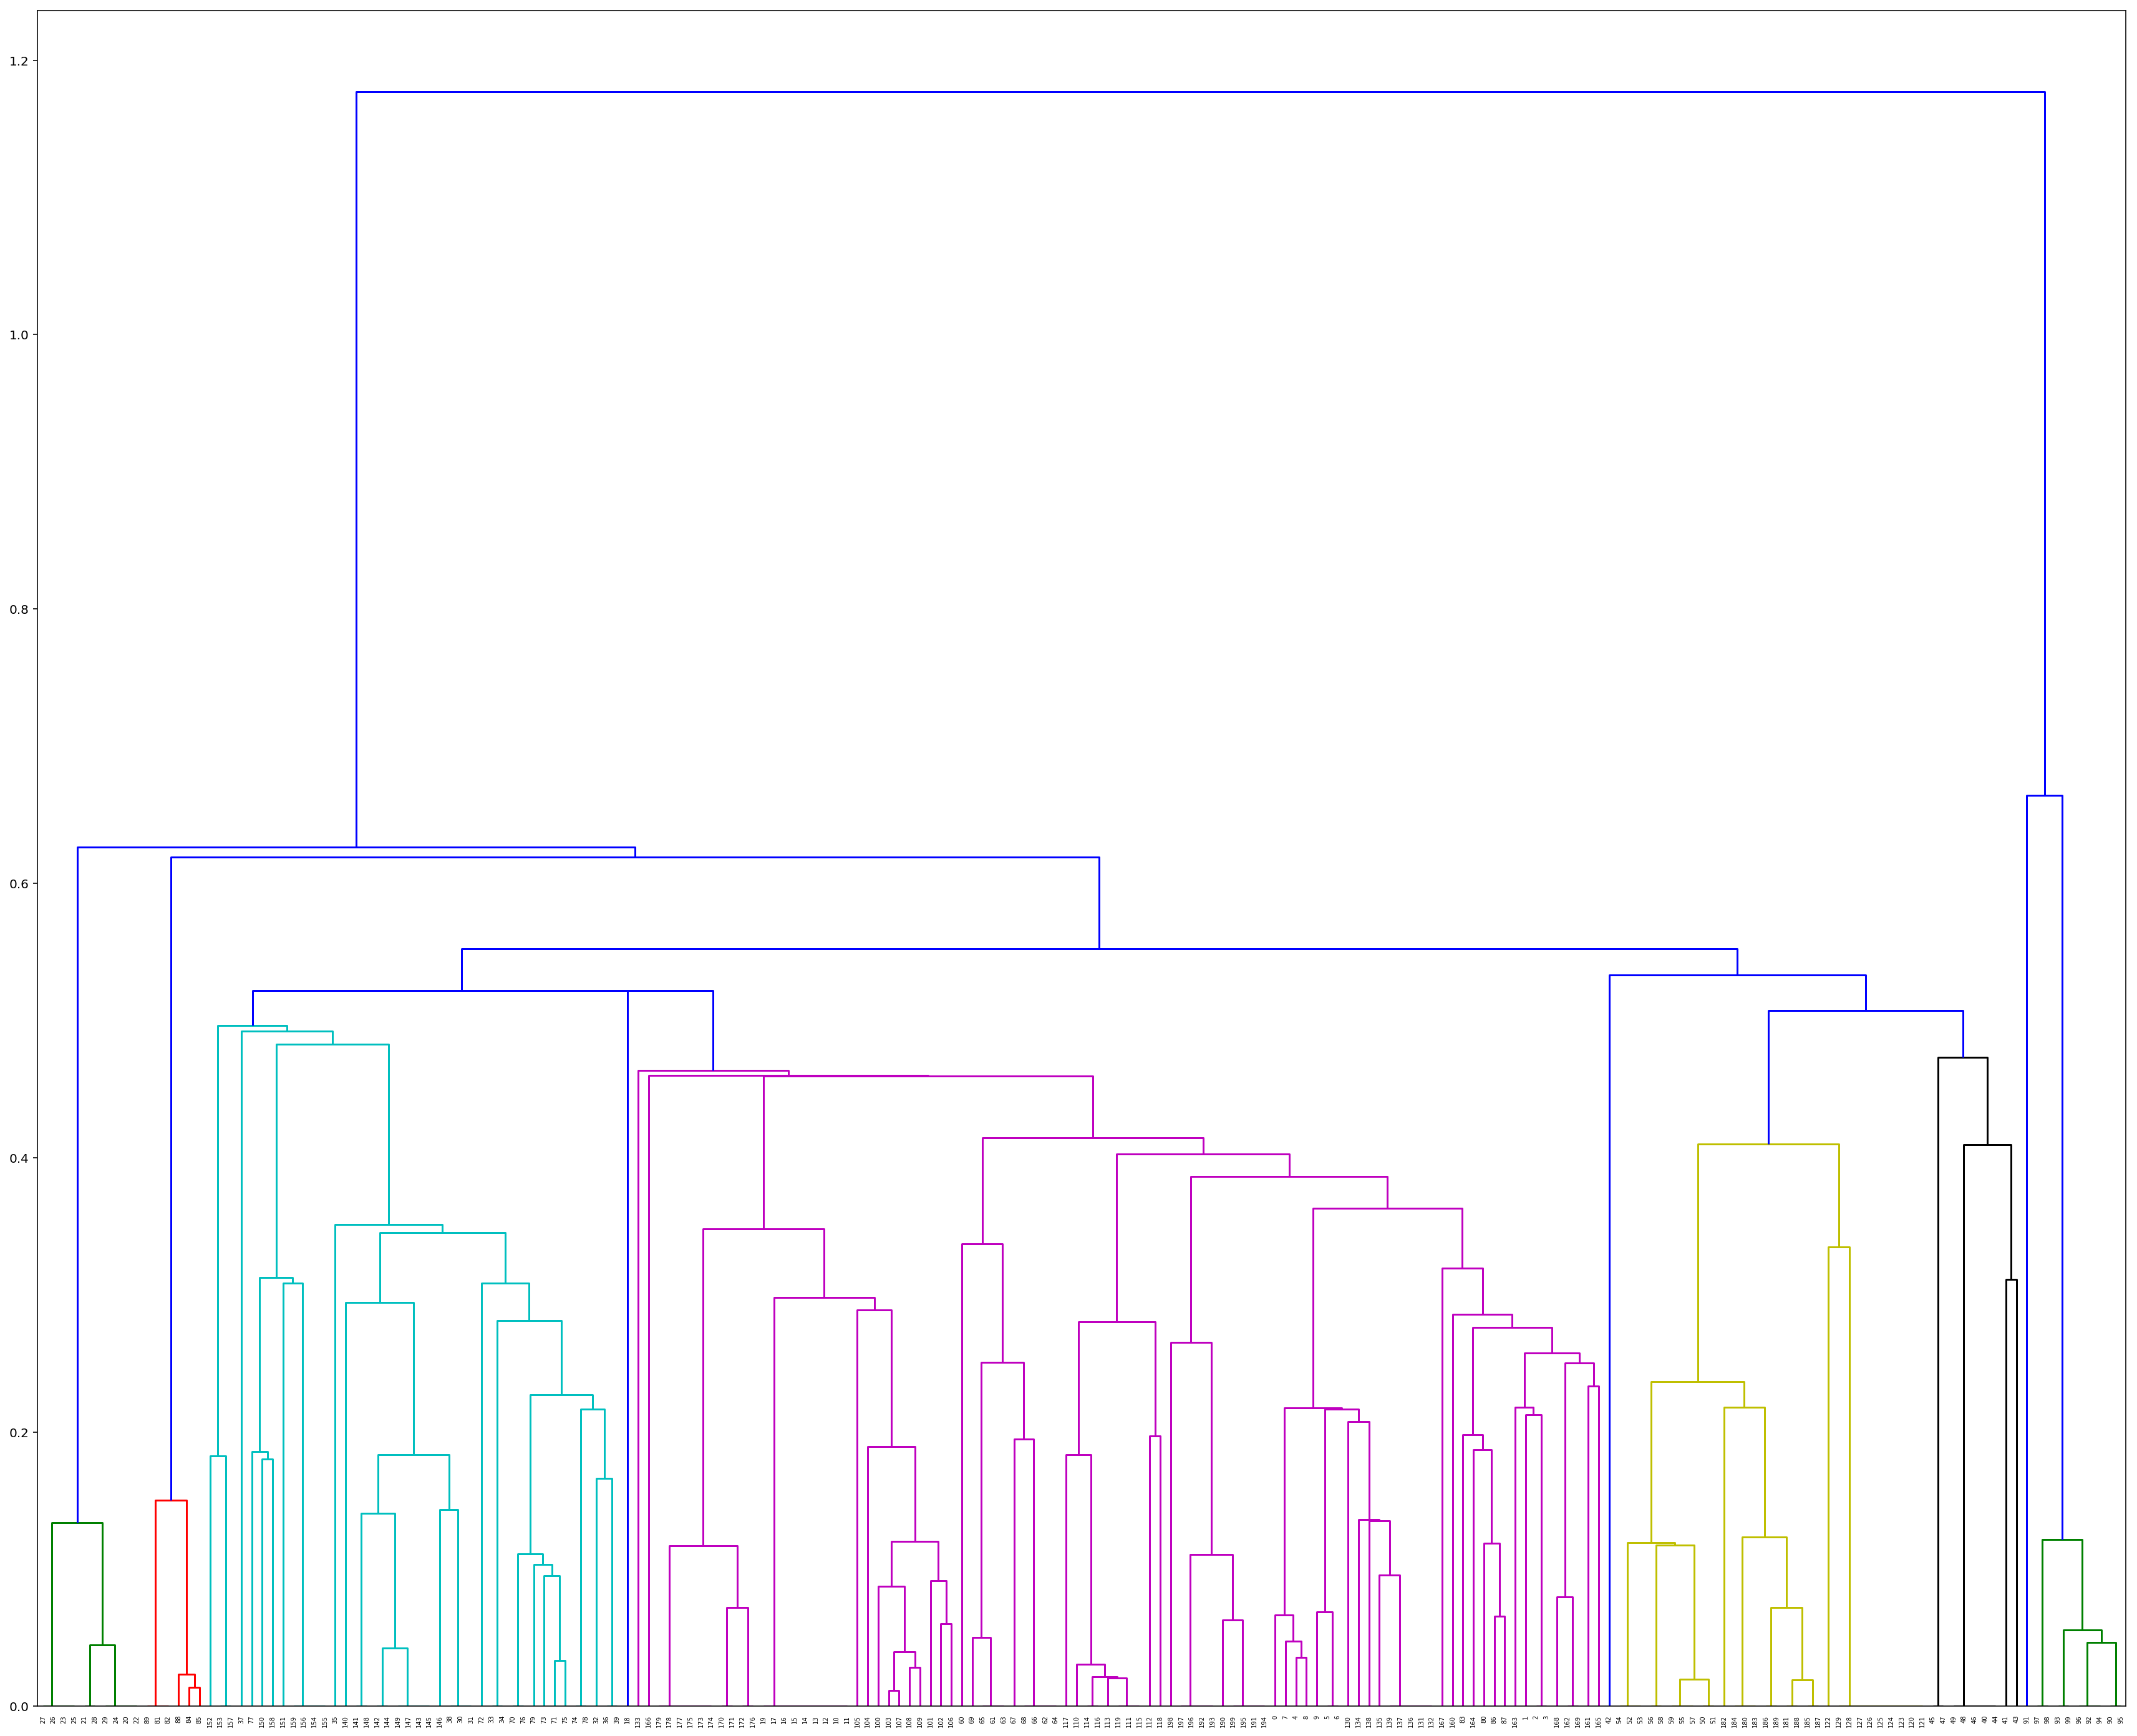

In [359]:
distance_mat = pdist(sample_itog) 
Z = hierarchy.linkage(distance_mat, 'single') 
plt.figure(figsize=(30, 25))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

Теперь можно четче видеть картину. Попробуем визуализировать метки кластеров на графике. Для этого нужно выделить метки полученных классов

Чтобы лучше строился scatter plot необходимо увеличить рамер множества. Так как увеличения множества приведет к неинтерпретируемой дендрограмме, не будем строить ее

In [362]:
sample_itog = []
for k in range(0,n_clusters):
    clst  = X_scaled[clusters==k]
    index = np.random.choice(np.arange(0,len(clst)),int(len(clst)/5),replace=False) #берем больше образцов их каждого кластера
    sample = clst[index]
    sample_itog.extend(sample)

In [363]:
distance_mat = pdist(sample_itog) 
Z = hierarchy.linkage(distance_mat, 'single') 

In [364]:
from scipy.cluster.hierarchy import fcluster

In [365]:
labels = fcluster(Z,0.15,criterion='distance')

In [366]:
df = pd.DataFrame({'labels': labels})

In [367]:
df_agg = pd.concat([pd.DataFrame(sample_itog,columns=['x','y']), df],axis=1)

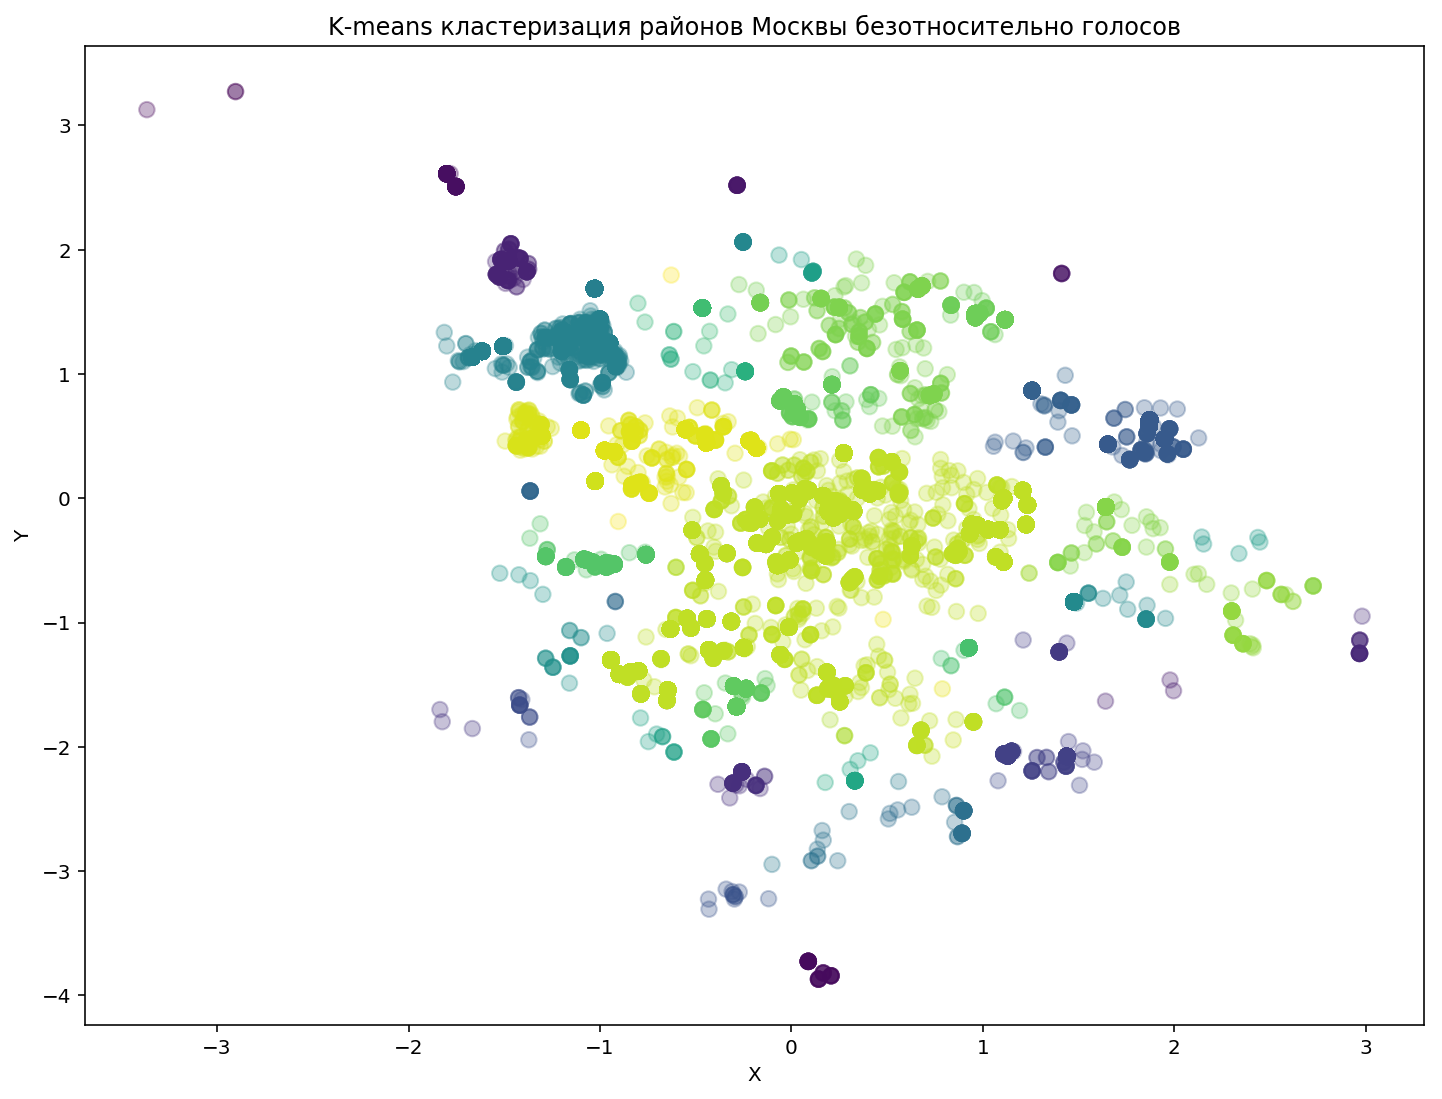

In [368]:
plt.scatter(df_agg['x'], df_agg['y'], c=df_agg['labels'] ,s=60, alpha = 0.3)
plt.title('K-means кластеризация районов Москвы безотносительно голосов')
plt.xlabel('X')
plt.ylabel('Y');

Уменьшение количества кластеров позволило нам позволило нам разглядеть некоторый более общий паттерн. Например, можем видеть сформированный кластер в середине, в левом верхнем углу, вверху графика, в правом верхнем углу. Более сформированный кластеры получаются в центре и вверху графика, что вполне согласуется с реалиями географии Москвы.

# Учитываем голоса

In [36]:
kmeans = MiniBatchKMeans(n_clusters=109,random_state=0)

In [6]:
data_short.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [17]:
X_votes_good = data_short[data_short['comment_class']==1][['x','y']].copy()

In [18]:
X_votes_bad = data_short[data_short['comment_class']==-1][['x','y']].copy()

In [19]:
X_votes_good_scaled = scaler.fit_transform(X_votes_good)
X_votes_bad_scaled = scaler.fit_transform(X_votes_bad )

Сначала просто визуализируем голоса на графике

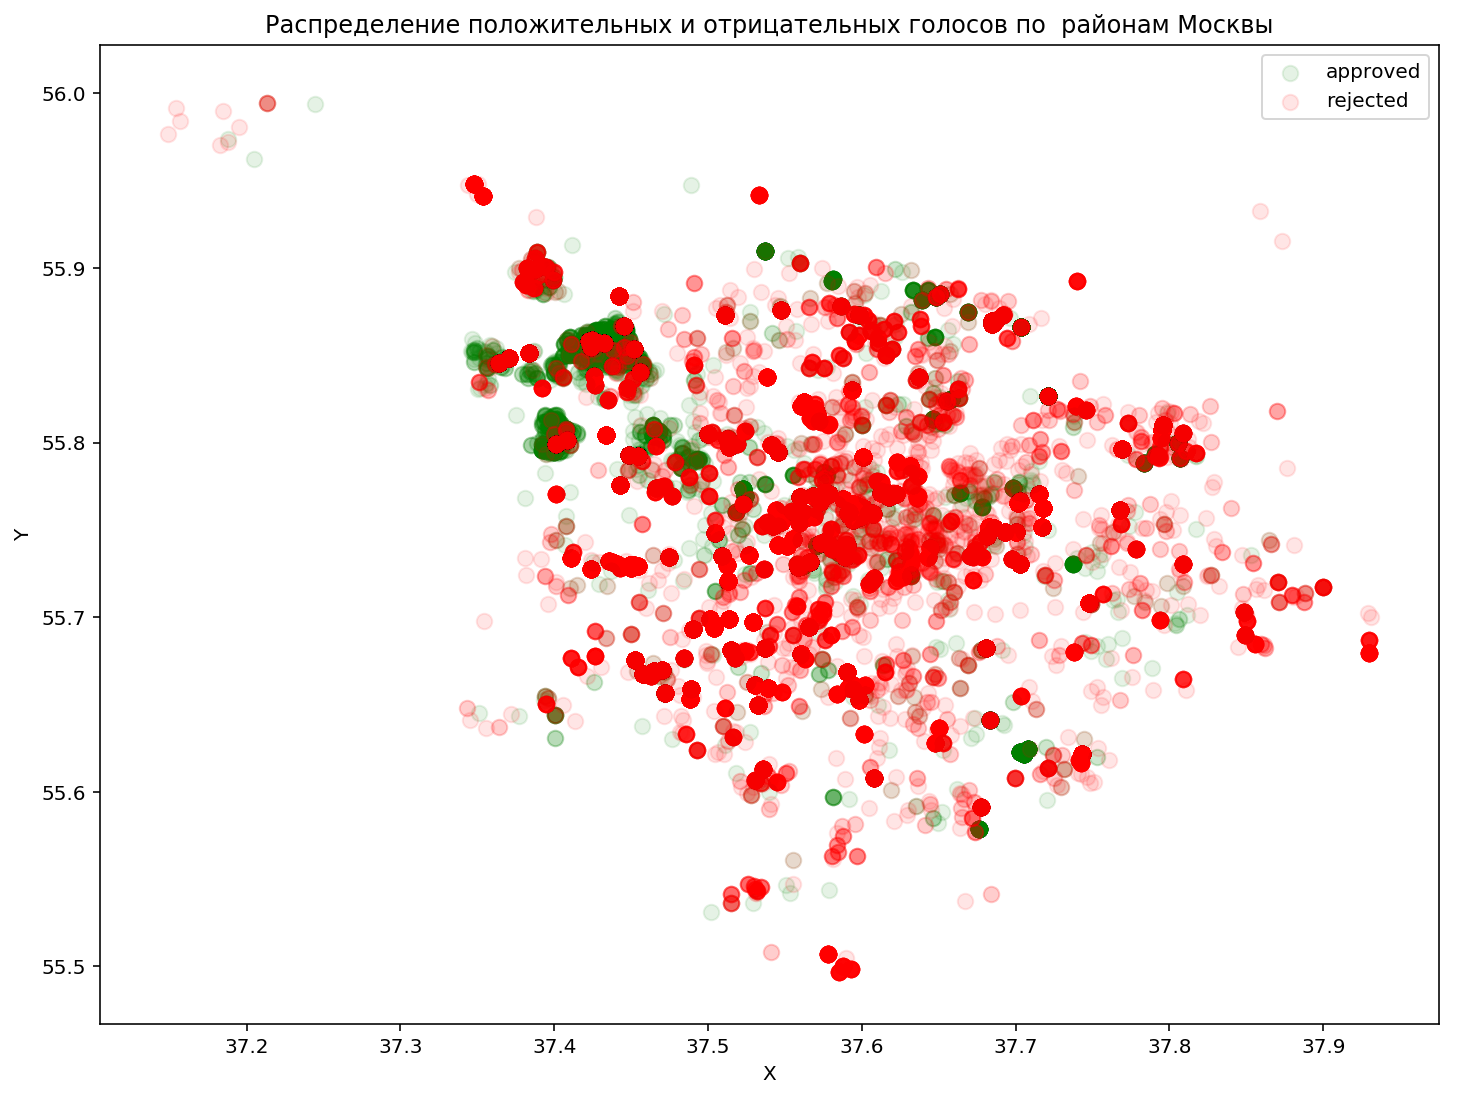

In [382]:
plt.scatter(X_votes[X_votes['comment_class']==1]['x'], X_votes[X_votes['comment_class']==1]['y'], c='g',s=60, alpha = 0.1,label='approved')
plt.scatter(X_votes[X_votes['comment_class']==-1]['x'], X_votes[X_votes['comment_class']==-1]['y'], c='r',s=60, alpha = 0.1,label='rejected')
plt.title('Распределение положительных и отрицательных голосов по  районам Москвы')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

Можем видеть, что в основном люди не согласашались с проектами. Особенно сильно это происходило в центре Москвы. Интересно отметить район в верхенем углу. В нем самое большое количество положительных отзывов. Похоже на северо-западный район Москвы. Посмотрим на сайте, что за постройки там планируются.https://stroi.mos.ru/stroitelstvo-v-okrugah-raionah/stroitelstvo-v-szao Много парков, храмов, школа, больница. Логично, что именно там много положительных отзывов.

Проведем кластеризацию для хороших и плохих голосов отдельно

In [37]:
kmeans.fit(X_votes_good )
clusters_good = kmeans.predict(X_votes_good)

In [38]:
kmeans.fit(X_votes_bad )
clusters_bad = kmeans.predict(X_votes_bad)

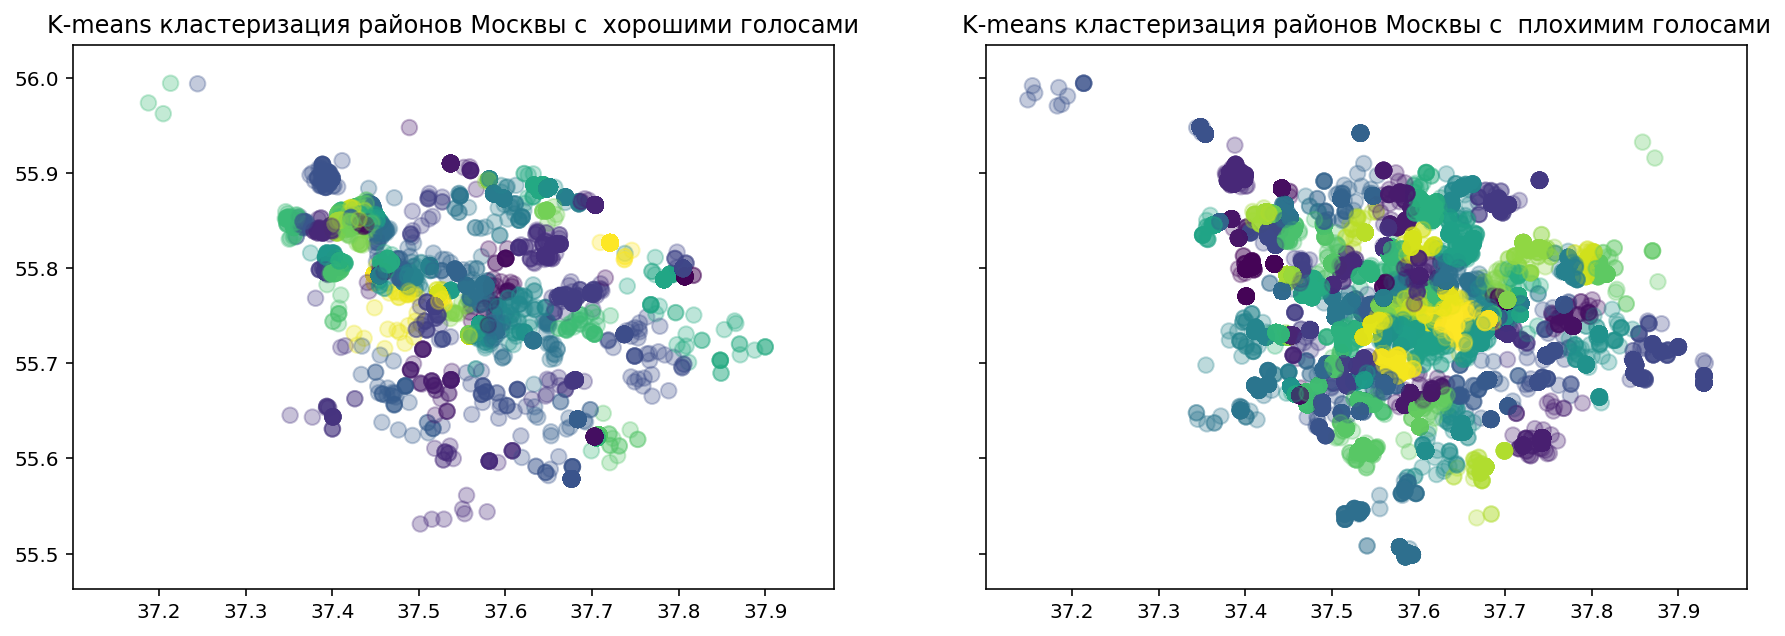

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 5))
axes[0].scatter(X_votes_good['x'], X_votes_good['y'], c=clusters_good,s=60, alpha=0.3)
axes[0].set_title('K-means кластеризация районов Москвы c  хорошими голосами')
axes[1].scatter(X_votes_bad ['x'], X_votes_bad ['y'], c=clusters_bad,s=60, alpha=0.3)
axes[1].set_title('K-means кластеризация районов Москвы c  плохимим голосами');

Из-за большего количество плохих голосов, кластеры в множестве с плохими голосами лучше сформированы, в то время как во множестве с хорошими голосами достаточно сильно рассеяны

# DBSCAN для определения наиболее активных в голосовании районов

Подобрали достаточно маленький eps и достаточно большоей min_samples, чтобы объединять только достаточно активные области

In [9]:
db = DBSCAN(eps=0.1, min_samples=50)

In [10]:
index_dbscan = np.random.choice(np.arange(len(X_scaled)),100000,replace=False)

In [11]:
db 

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=50, n_jobs=1, p=None)

In [12]:
X_sample_dbscan = X_scaled[index_dbscan]

In [13]:
clusters = db.fit_predict(X_sample_dbscan)

In [14]:
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
      dtype=int64)

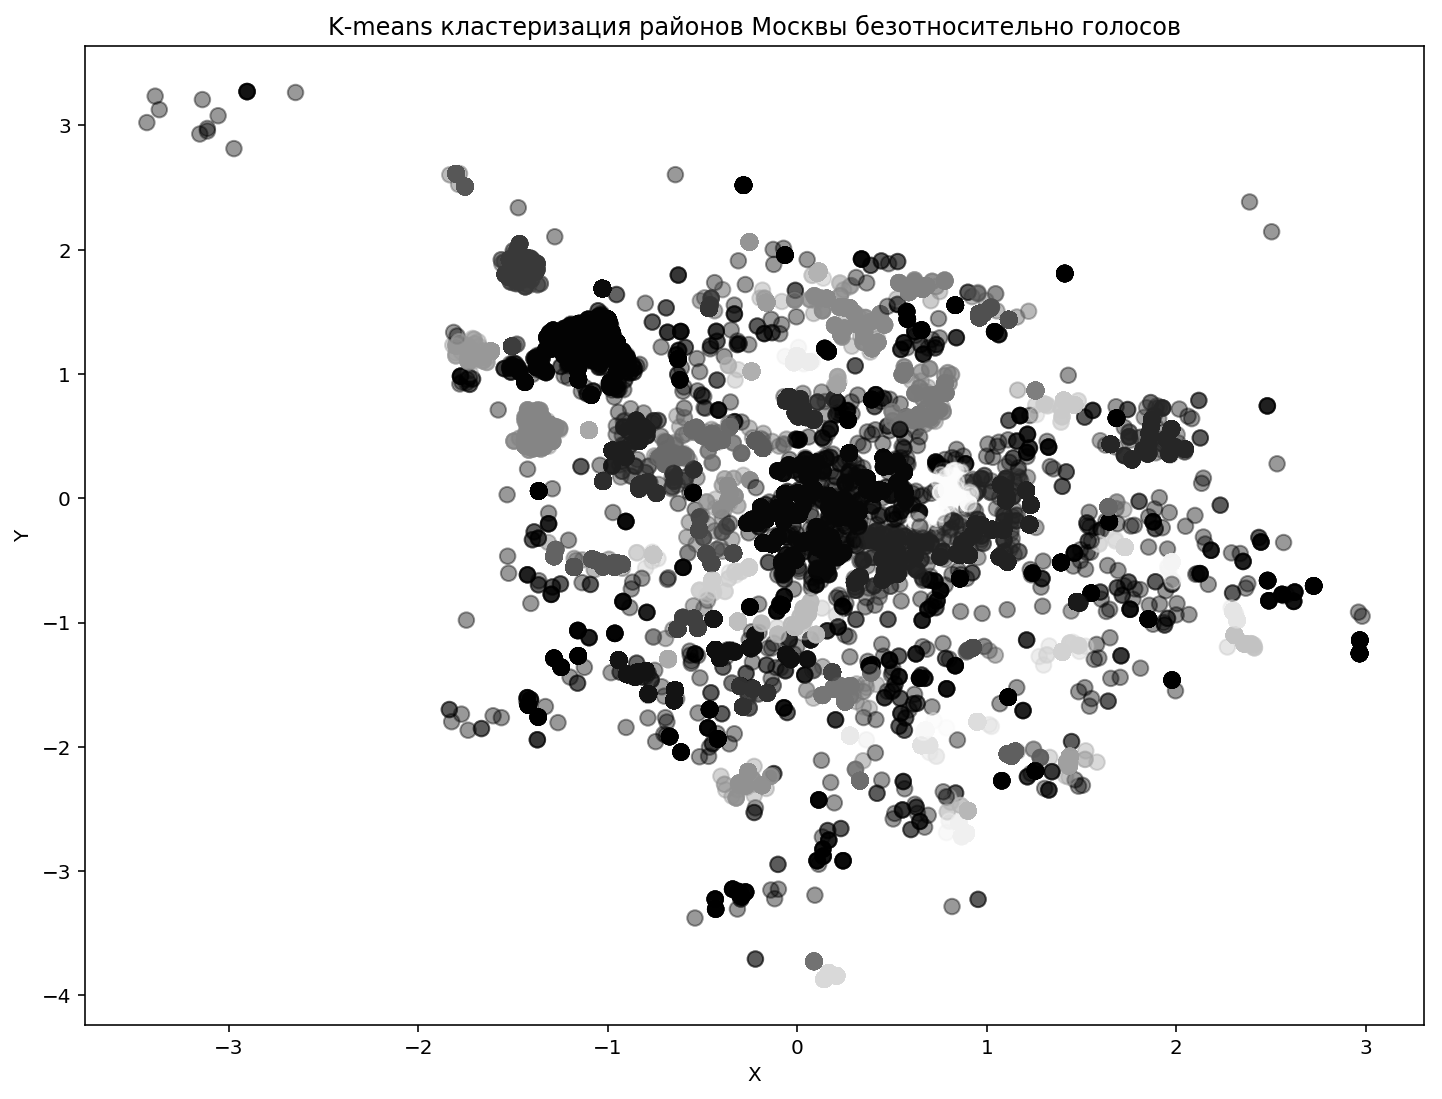

In [15]:
plt.scatter(X_sample_dbscan[:, 0], X_sample_dbscan[:, 1], c=clusters,s=60,cmap='gray',alpha = 0.4)
plt.title('K-means кластеризация районов Москвы безотносительно голосов')
plt.xlabel('X')
plt.ylabel('Y');

По графику можно видеть, что наиболе активными оказались северо западный район, центральный район, чуть менее северо восточный.